In [284]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

In [285]:
df = pd.read_csv('Mall_Customers.csv')
number = LabelEncoder()
df_gen = number.fit_transform(df['Gender'])
dfg = pd.DataFrame(data = df_gen)
dfu = pd.concat([df,dfg],axis=1)
df = dfu.drop('Gender',axis=1 ,inplace = True)
df = dfu.rename(columns = {0:'Gender'})

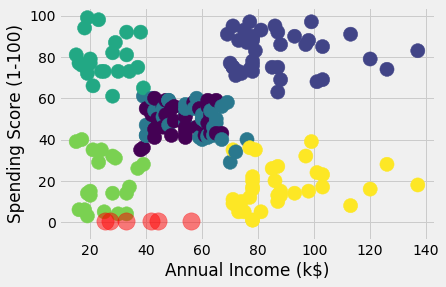

In [286]:
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels, 
            s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

Reading Labelled data set

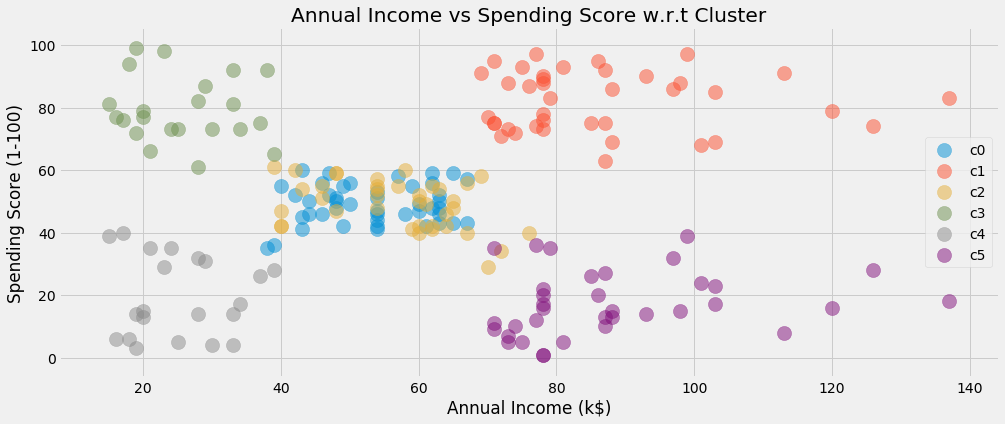

In [287]:
df = pd.read_csv('mc.csv')
plt.figure(1 , figsize = (15 , 6))
for Cluster in ['c0','c1','c2','c3','c4','c5']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = df[df['Cluster'] == Cluster] ,s = 200 , alpha = 0.5 , label = Cluster)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Cluster')
plt.legend()
plt.show()


Looking at the data labelling clusters as below

0 - 'Balanced - Aged', 
1 - 'High Income and High Spending',
2 - 'Balanced - Young',
3 - 'Low Income and High Spending',
4 - 'Low Income and Low Spending',
5 -  'High Income and Low Spending'

# KNeighborsClassifier

In [288]:
#Reading the Labelled data set
df_c = pd.read_csv('mc.csv')
#Dropping un necessary columns
df_c = df_c.drop('CustomerID',axis =1)
y = df_c['Label']
df_c = df_c.drop('Cluster',axis =1)
df_c = df_c.drop('Label',axis =1)
df_c = df_c.drop('Gender_C',axis =1)
X = df_c

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45) 
#Classifier
knn = KNeighborsClassifier(n_neighbors=6)  
knnfit = knn.fit(X_train, y_train)
knnpredicted = knn.predict(X_test)

Confusion Matrix and Accuracy Score

In [289]:
results = confusion_matrix(y_test, knnpredicted)   
print('Confusion Matrix : For KNN ')
print(results)
print('-----------------------------------')
print("Accuracy Score for KNN")
print(acc6)
print('-----------------------------------')

Confusion Matrix : For KNN 
[[ 8  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  5  0]
 [ 0  2  0  0  0  4]]
-----------------------------------
Accuracy Score for KNN
0.925
-----------------------------------


Testing with unknown customer record 

In [290]:
X_test_uk = [[1,25,75,30],[0,67,45,30],[1,38,80,60],[0,42,35,20]]
X_test_uk = pd.DataFrame(X_test_uk)
knnpredicted = knn.predict(X_test_uk)

In [291]:
knnpredicted

array(['Balanced - Young', 'Balanced - Aged',
       'High Income and High Spending', 'Low Income and Low Spending'],
      dtype=object)